In [1]:
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=

In [2]:
from tqdm import tqdm
import numpy as np

import medmnist
from medmnist import INFO, Evaluator

In [3]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v3.0.2 @ https://github.com/MedMNIST/MedMNIST/


In [4]:
try:
    import dataset_without_pytorch
    from dataset_without_pytorch import get_loader
except ImportError as e:
    !wget -L https://raw.github.com/MedMNIST/MedMNIST/main/examples/dataset_without_pytorch.py
    import dataset_without_pytorch
    from dataset_without_pytorch import get_loader

--2025-05-17 06:09:14--  https://raw.github.com/MedMNIST/MedMNIST/main/examples/dataset_without_pytorch.py
Resolving raw.github.com (raw.github.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/MedMNIST/MedMNIST/main/examples/dataset_without_pytorch.py [following]
--2025-05-17 06:09:14--  https://raw.githubusercontent.com/MedMNIST/MedMNIST/main/examples/dataset_without_pytorch.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9507 (9.3K) [text/plain]
Saving to: ‘dataset_without_pytorch.py’

dataset_without_pyt 100%[===================>]   9.28K  --.-KB/s    in 

Work on 2D dataset with images of size 28x28

In [5]:
data_flag = 'breastmnist'

download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(dataset_without_pytorch, info['python_class'])

Read the MedMNIST data, preprocess them and encapsulate them into dataloader form

In [6]:
# load the data
train_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = get_loader(dataset=train_dataset, batch_size=BATCH_SIZE)

100%|██████████| 560k/560k [00:00<00:00, 1.14MB/s]


In [7]:
print(train_dataset)

Dataset BreastMNIST (breastmnist)
    Number of datapoints: 546
    Root location: /root/.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0


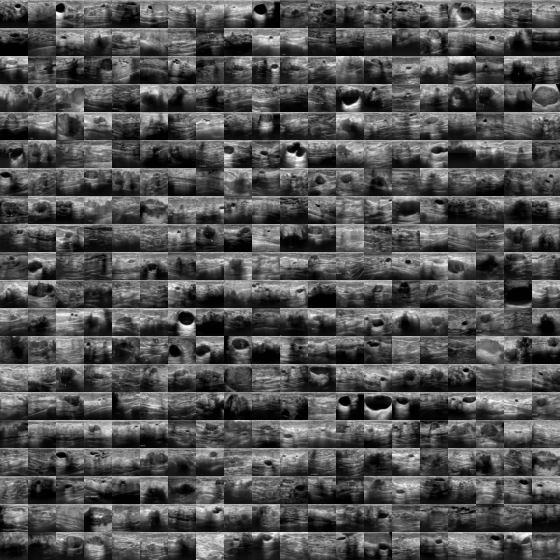

In [8]:
# visualize the dataset

train_dataset.montage(length=20)

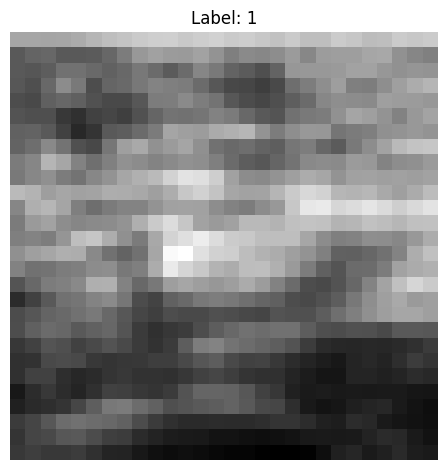

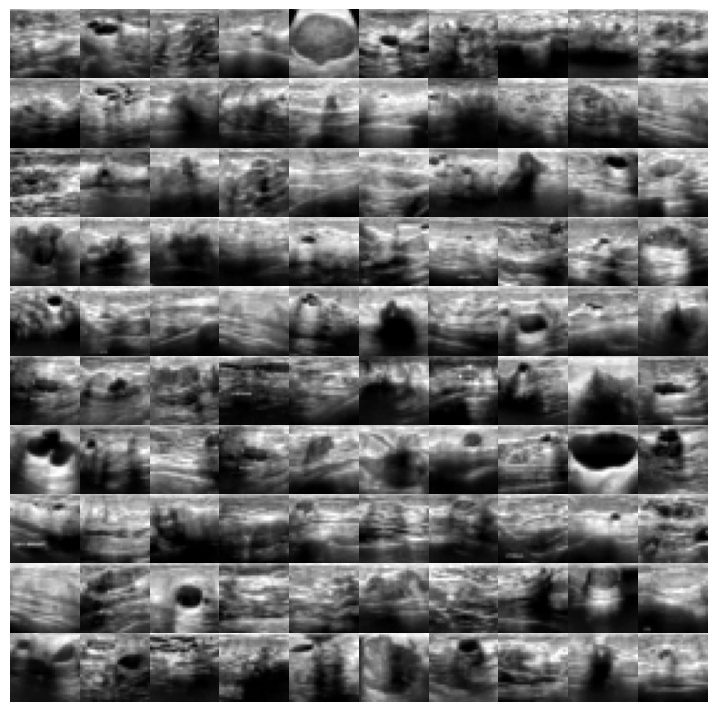

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Define save path
IMAGES_PATH = Path() / "images" / "medmnist"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

# Function to save figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Function to plot a single MedMNIST image
def plot_image(image_data, cmap="gray"):
    if isinstance(image_data, np.ndarray) and image_data.ndim == 3:
        image_data = image_data.squeeze()
    plt.imshow(image_data, cmap=cmap)
    plt.axis("off")

# Plot one example
dataset = train_dataset
img, label = dataset[0]
plot_image(np.array(img))
plt.title(f"Label: {label[0]}")
save_fig("medmnist_single_image")
plt.show()

# Plot a grid of 100 examples (10x10)
plt.figure(figsize=(9, 9))
for idx in range(100):
    img, label = dataset[idx]
    plt.subplot(10, 10, idx + 1)
    plot_image(np.array(img))
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("medmnist_100_grid", tight_layout=False)
plt.show()